In [190]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from wordcloud import WordCloud

In [77]:
train_set = pd.read_csv('../tweeter/train_tweets.csv')

In [37]:
train_set.head(2)

,Unnamed: 0,preprocessed_tweets,toxic_comment
0,0,as woman shouldnt complain cleaning house man ...,0
1,1,boy dats coldtyga dwn bad cuffin dat hoe 1st p...,1


In [38]:
train_set['toxic_comment'].value_counts()

1    21308
0     3475
Name: toxic_comment, dtype: int64

In [205]:
vect = CountVectorizer(token_pattern = r"[a-z]+", ngram_range=(1,1), min_df=50).fit(train_set['preprocessed_tweets'])

In [206]:
feature_names = vect.get_feature_names()

In [207]:
X = train_set['preprocessed_tweets']
y = train_set['toxic_comment']
X = vect.transform(X)

In [208]:
len(feature_names)

599

In [209]:
feature_names[0:20]

['a',
 'act',
 'acting',
 'actually',
 'af',
 'ago',
 'ah',
 'aint',
 'all',
 'almost',
 'already',
 'also',
 'always',
 'am',
 'america',
 'and',
 'annoying',
 'another',
 'anyone',
 'anything']

In [210]:
vect.vocabulary_

{'a': 0,
 'woman': 571,
 'house': 227,
 'man': 294,
 'always': 12,
 'take': 472,
 'trash': 514,
 'boy': 51,
 'dat': 104,
 'bad': 31,
 'hoe': 222,
 'st': 457,
 'place': 375,
 'you': 593,
 'ever': 138,
 'fuck': 171,
 'bitch': 46,
 'start': 459,
 'cry': 95,
 'shit': 431,
 'look': 280,
 'like': 269,
 'the': 487,
 'hear': 212,
 'might': 304,
 'true': 516,
 'told': 509,
 'ya': 583,
 'somebody': 449,
 'still': 463,
 'fucking': 174,
 'i': 230,
 'sit': 440,
 'hate': 209,
 'another': 17,
 'got': 197,
 'much': 319,
 'going': 192,
 'cause': 74,
 'im': 235,
 'tired': 505,
 'big': 43,
 'coming': 87,
 'u': 527,
 'girl': 186,
 'get': 182,
 'back': 30,
 'thats': 486,
 'everyone': 141,
 'lol': 278,
 'smh': 445,
 'so': 447,
 'smoke': 446,
 'yea': 586,
 'go': 190,
 'thing': 493,
 'nigga': 338,
 'miss': 308,
 'love': 286,
 'cut': 97,
 'b': 28,
 'black': 47,
 'broke': 56,
 'cant': 69,
 'tell': 479,
 'nothing': 349,
 'see': 422,
 'wont': 573,
 'change': 75,
 'dont': 119,
 'even': 137,
 'suck': 468,
 'dick': 

In [211]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

In [85]:
i=200
j=10

word = vect.get_feature_names()[i:i+10]
pd.DataFrame(x_train[j:j+7, i:i+10].todense(), columns = word)

,affecting,affection,affiliated,affiliation,affleck,afford,affordable,afghanistan,afi,afl
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [31]:
test_text = ['woman shouldnt complain cleaning house',
             'boy dats coldtyga dwn bad cuffin dat hoe 1st place',
             'dawg you ever fuck bitch start cry you confused shit',
             'ganderson based look like tranny',
             'shit hear might true might faker bitch told ya'
]

In [32]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(test_text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
df

,1st,bad,based,bitch,boy,cleaning,coldtyga,complain,confused,cry,...,place,shit,shouldnt,start,told,tranny,true,woman,ya,you
0,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,2
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [212]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, logreg_pred)

In [213]:
logreg_acc

0.9148678636271939

In [48]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       693
           1       0.95      0.96      0.96      4264

    accuracy                           0.92      4957
   macro avg       0.85      0.82      0.83      4957
weighted avg       0.92      0.92      0.92      4957



In [214]:
confusion_matrix(y_test, logreg_pred)

array([[ 481,  212],
       [ 210, 4054]])

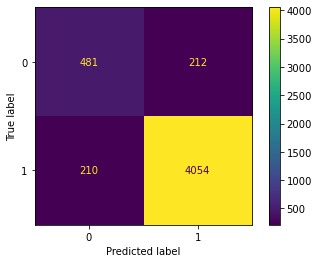

In [215]:
cm = confusion_matrix(y_test, logreg_pred, labels = logreg.classes_)
dsp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
dsp.plot()

Text(0.5, 1.0, 'Accuracy Score: 0.9148678636271939')

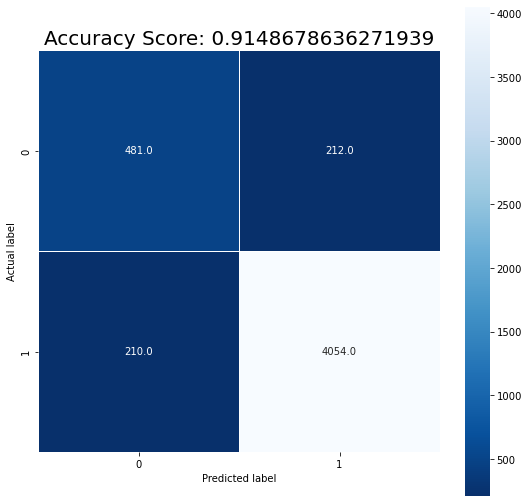

In [216]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot =True, fmt=".1f", linewidths=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
sample_title ='Accuracy Score: {0}'.format(logreg_acc)
plt.title(sample_title,size=20)

In [209]:
error = (y_test != logreg_pred) & (y_test == 1)

In [164]:
print(X[error][1])

  (0, 5425)	1
  (0, 6484)	1
  (0, 15116)	1
  (0, 17350)	1


In [217]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [130]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid= {'C':[100,10,1.0,0.1, 0.01], 'solver':['newton-cg', 'lbfgs', 'liblinear']}
grid=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best cross validation score: {:.2f}" .format(grid.best_score_))
print("Best parameters: ", grid.best_params_, "Best score:", grid.best_score_)

/home/evgeniya/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/evgeniya/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best cross validation score: 0.92
Best parameters:  {'C': 10, 'solver': 'liblinear'} Best score: 0.9160695927998326


In [218]:
y_pred=grid.predict(x_test)
logreg_acc=accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%" .format(logreg_acc*100))

NameError: name 'grid' is not defined

In [ ]:
## Make Predictions on new tweets and print out a few toxic tweets

In [219]:
new_tweets = pd.read_csv('../tweeter/df_tweets.csv')

In [220]:
new_tweets.head(3)

,Unnamed: 0,text
0,0,generally masking requirement cross border tra...
1,1,u wear mask u naver happy mask
2,2,masking almost wiped flu past couple year isnt...


In [221]:
x = new_tweets['text'].astype(str)

In [55]:
x 

0        generally masking requirement cross border tra...
1                           u wear mask u naver happy mask
2        masking almost wiped flu past couple year isnt...
3        ffsmy county highest rate regionive never stop...
4        doublevaxxed covid taking another vaccine stil...
                               ...                        
89310    two half year dodging covid drop masking requi...
89311    easiest answer cancel truth seems isnt possibl...
89312    smart safe rule thumb use possibility error ju...
89313    leech hhs science prof universal esp high filt...
89314    yup still masking covid isnt backwater state a...
Name: text, Length: 89315, dtype: object

In [222]:
new_vec = vect.transform(x)

In [223]:
new_vec

<89315x599 sparse matrix of type '<class 'numpy.int64'>'
	with 526323 stored elements in Compressed Sparse Row format>

In [137]:
new_vec.get_feature_names()

AttributeError: get_feature_names not found

In [138]:
new_vec.vocabulary_

AttributeError: vocabulary_ not found

In [224]:
new_labels = logreg.predict(new_vec)

In [225]:
new_tweets['toxic_comment'] = new_labels.tolist()

In [227]:
new_tweets.head()

,Unnamed: 0,text,toxic_comment
0,0,generally masking requirement cross border tra...,0
1,1,u wear mask u naver happy mask,0
2,2,masking almost wiped flu past couple year isnt...,0
3,3,ffsmy county highest rate regionive never stop...,1
4,4,doublevaxxed covid taking another vaccine stil...,0


In [228]:
i=1
for tweet in new_tweets[new_tweets['toxic_comment']==1]['text']:
    print(tweet + '\n')
    i= i+1

ffsmy county highest rate regionive never stopped masking dont plan anytime soon

wear damn mask folk

wear mask told everyone else

protect said wear mask still got pregnant fuck advises

almost every friend hadnt yet gotten last month even still masking indoors public

toad wear mask know youre smooth brain knew relative size particulate youd know wearing mask stop covid like putting chain link fence stop mosquito lack intelligence proudly displayed face

amezon decided people gonna dothey asked people wear mask fussedasked em get vaccine thought govt trying kill em

rate going rage may materialise baseball bat filthy thing stinking yard still wear mask sent abc happy letter well life suck

wonder study getting tattoo link mental healthdepression pain tattoo temporarily masking internal pain im tattoo plan getting blastedbut ive noticed people getting tattoo based impulse sadness

get f take precaution get vaccinated wash hand wear mask ect stupid taking precaution effecting raid saf


lol simpletonsarticles author say intended push masking

voted local election two democrat one lost republican reading blm racism antigun rhetoric pandemic lockdownmasking mandate bullshit im glad voted line republican 2020 recent year

besides blame issue age weight fact im still wearing mask say impedes sense smell messing taste smell thing fine kinda like pregnant dont wear mask home car

cant wear mask much longer 20 minute time due sensory issue medical clinic offering accomodations people like need seen person

swear bay island lyf best like u dont wear mask bc 0 case unlimited seafood w cheaper price fresh air many beach lot explore

noin general vaccine completely preventnever hear would prevent infection told continue masking even vaccination

still wear mask outside better cuz aid

wear mask u tryna hide

see something sinister behind antivax antimask progun lobby dont think outlandish think group puppet influenced putin puppet master

trumper would fair say covered communit

seeing half staff customer unmasked finally wanted last time thanked two staff masking one said course pandemic isnt

mba uk cant life understand eu country health agency dropping mask mandate flightsin airport covidisnotover

wish would outdoors guess maybe thats challenging plan weather definitely masking hard enforce mind mandated public health

lonely celebrate birthday yourselfbut cant force celebrate day bunch people wear mask dont attempt gaslight meim tired tired

pharmer apparently wrong offend others masking wrong endanger others masking simultaneously im gonna take drinking

im confused pro looking anti coz stance vaccine masking compared tweetwhat amazing place mind must

wow offensive guy think dumb inconsiderate wear mask tattoo asian girl assume must smart onetough choice highlevel stupid going

feel got obligation list every reason masking tweet mentioning get grip seriously maybe next lifetime youll 110th done community health tone policing topic deranged

happy see ma

took precaution even wear mask gym maybe half second take photo hard everywhere hereim hoping symptom arent much

wearing mask like wear nappy case neighbor shit pant

best get get vaccinated boostedwear mask indoor public space outdoor crowded space

coersion coerces wow brilliant statement explaining physic behind masking instead physic show dont work aerosolized virus strong power idiot

sf ucsf said definitely masking indoors lot virus circulating number official actual number probably two three even time actual number

look hideous yall wonder still wear maskim embarrassed face

ended still trying reinstitute airplane mask mandate stopped white supremacy wh still using allpurpose boogeyman

cant belive still mask mandate havent wear mask month

im really trying rude say yall stop acting shocked get covid know dont wear mask public anymore always big crowd giving delulu hope yall feel better seriously let logical

people denying secondhand smoke real people threw fit moving smoking

keep indoor masking many wrong thing even know better case point went pharmacy walk employee stocking maskless look ffp 2 many pharmacist wont need soon

return tested positive think could avoided mask mandate introduced booked another cruise board cancelling longer confidence company delivering commitment

kate didnot posing camera broke lawthe mask mandate illegal gatheringsothers arrested wasnt dont say anything woman arrested

show one good study support masking effective measure one greatest lie medical community ever pushed public zero data support use may help little scientific data

hello look wearamask nft collection opensea

try drinking beer something youre watching game relax man life short bitch people choosing wear mask odd sure warrant anger

wear mask likewont damn thing make feel better go right ahead

explanation negative breast cancer omd trial different biology imagingdefined omd fu short many line systemic tx masking effect local tx

ponce agree everyone going craz

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [229]:
i=1
for tweet in new_tweets[new_tweets['toxic_comment']==0]['text']:
    print(tweet + '\n')
    i= i+1

generally masking requirement cross border travel masking mandatory travelling plane train airport public transit dont forget fully vaxxed 2 3 dos depending timeline play event proof

u wear mask u naver happy mask

masking almost wiped flu past couple year isnt anything unexpected always going come roaring back first flu season mask largely discarded

doublevaxxed covid taking another vaccine still wear mask

mask mandate

3 30 people work mask person caught covid work past year one 3 double mask vaxxed boosted done everything could avoid came back work past week still masking lol sense

seek help mass formation psychosis still believe masking testing vaxxing boosting help

cie shes anti mask wackjob according profile

osu oh agree ive got baby isnt old enough wear mask 4 yr old young get vaxxed first time took plane trip 2 yr isolating judge overturned mask mandate could fly back

people havent wanted wear mask right offits miracle havent gotten safe filmingcant wait see

mask busine

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
#feature importance according to a coefficient

In [230]:
logreg.coef_[0].argsort()

array([585,  76, 589, 363, 358, 247,  44, 167,   5,  20, 439,  59, 105,
        85, 279,  52, 535, 426, 217, 510, 484, 312,  33, 155, 309, 457,
       402,  88, 300, 508, 420, 536, 380, 545, 582, 416, 296, 432, 188,
       343,  72, 436, 114, 238,  58, 378, 466, 283, 297, 161, 532,  18,
        27,  93, 253, 460, 507,  91, 135, 179, 293,  87, 212, 254, 332,
       123, 158, 575, 550, 576, 377, 474,  11, 404, 498, 353, 102, 263,
       100, 144, 129, 487, 477, 529, 246, 456,  14, 268, 352, 564, 424,
        19, 248, 414, 497, 111, 321, 311, 204, 506, 534, 350, 112, 565,
       275,  81, 131, 151, 374, 181, 127, 164, 120, 570, 513, 281,  30,
       442, 273, 449, 421, 371, 554, 540, 163, 328, 121, 493, 136, 177,
       360, 544, 463, 227, 472, 546,  38,  13, 210, 199, 561, 461, 595,
       521,   0, 289, 566, 547,  29, 419, 396, 511, 440, 450, 454, 473,
       284, 392, 345, 262, 165, 433, 228,  61, 542, 234,  73,  23, 327,
       214, 243, 388, 503, 549, 530, 364, 500, 255, 400, 244, 50

In [231]:
coef_df = pd.DataFrame(
     { 'variable': feature_names,
       'coefficient': logreg.coef_[0]
         
     }).round(decimals =2).sort_values('coefficient', ascending =False)#.style.bar(color=['green','red'], align='zero')

In [233]:
coef_df.head(10)

,variable,coefficient
46,bitch,5.17
222,hoe,4.75
387,pussy,4.50
339,niggah,3.70
96,cunt,2.88
431,shit,2.63
342,nigguh,2.62
335,niccas,2.51
334,nicca,2.50
522,twat,2.34


In [170]:
coef_df.tail(20)

,variable,coefficient
19314,twinkie,-1.27
9166,ink,-1.29
2405,brownie,-1.29
11847,mill,-1.31
16833,slant,-1.32
11943,mlb,-1.33
5564,eggplant,-1.33
3588,colored,-1.36
20351,whatever,-1.36
16901,slope,-1.37


In [115]:
neg.style.bar(color=['green','red'], align='zero')

,variable,coefficient
1786,bitch,4.810000
8430,hoe,4.580000
14687,pussy,4.120000
12688,niggah,3.240000
4199,cunt,2.520000
16482,shit,2.450000
12719,nigguh,2.130000
12627,nicca,2.110000
12630,niccas,2.080000
12665,nig,2.070000


In [234]:
logreg.predict_proba(x_test)

array([[0.40219216, 0.59780784],
       [0.01078347, 0.98921653],
       [0.38829572, 0.61170428],
       ...,
       [0.02478429, 0.97521571],
       [0.16785635, 0.83214365],
       [0.00487246, 0.99512754]])

In [74]:
#Train Naive Bayes

In [235]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(x_train, y_train)

MultinomialNB()

In [236]:
y_pred_nb = nb_clf.predict(x_test)

In [237]:
nb_acc = np.mean(y_test==y_pred_nb)
nb_acc

0.9049828525317732

In [238]:
confusion_matrix(y_test, y_pred_nb)

array([[ 414,  279],
       [ 192, 4072]])

In [65]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.70      0.55      0.61       693
           1       0.93      0.96      0.95      4264

    accuracy                           0.90      4957
   macro avg       0.82      0.75      0.78      4957
weighted avg       0.90      0.90      0.90      4957



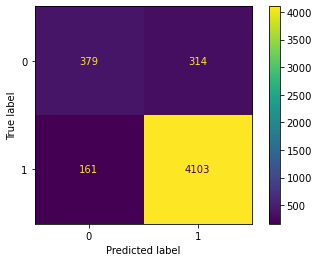

In [71]:
cm_nb = confusion_matrix(y_test, y_pred_nb, labels = nb_clf.classes_)
dsp1 = ConfusionMatrixDisplay(confusion_matrix = cm_nb, display_labels = nb_clf.classes_)
dsp1.plot()

Text(0.5, 1.0, 'Accuracy Score: 0.9041759128505145')

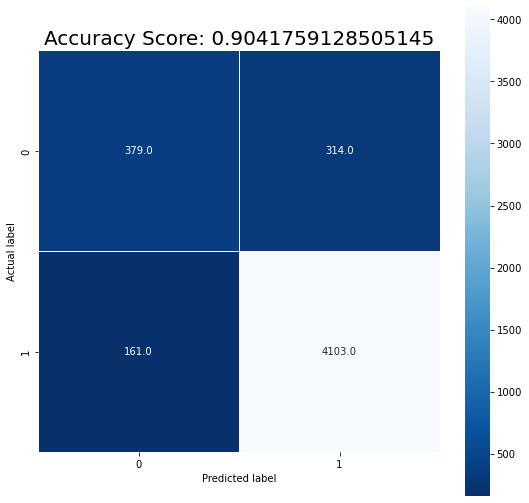

In [74]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_nb, annot =True, fmt=".1f", linewidths=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
sample_title ='Accuracy Score: {0}'.format(nb_acc)
plt.title(sample_title,size=20)

In [239]:
nb_labels = nb_clf.predict(new_vec)

In [240]:
new_tweets['nb_label']=nb_labels.tolist()

In [241]:
new_tweets.head()

,Unnamed: 0,text,toxic_comment,nb_label
0,0,generally masking requirement cross border tra...,0,1
1,1,u wear mask u naver happy mask,0,1
2,2,masking almost wiped flu past couple year isnt...,0,0
3,3,ffsmy county highest rate regionive never stop...,1,1
4,4,doublevaxxed covid taking another vaccine stil...,0,0


In [242]:
nb_clf.feature_log_prob_

array([[-5.1374777 , -7.87184521, -8.38267083, ..., -6.77323292,
        -5.58946282, -8.38267083],
       [-5.82968064, -6.86766831, -7.60082082, ..., -7.16190778,
        -5.50618912, -7.7549715 ]])

In [243]:
#P(word| )
pos_probs = nb_clf.feature_log_prob_[0, :]

In [244]:
neg_probs = nb_clf.feature_log_prob_[1, :]

In [245]:
delta_probs = pos_probs-neg_probs

In [250]:
print("\nFeatures that are most indicative of negative tweet:\n")
for i in np.argsort(delta_probs)[:20]:
    print(feature_names[i])


Features that are most indicative of negative tweet:

bitch
hoe
niggah
pussy
shit
tf
nigga
basic
fucked
ion
fuck
dick
talkin
slut
instagram
niccas
as
yo
twat
jason


In [251]:
print("\nFeatures that are most indicative of positive tweet:\n")
for i in np.argsort(np.abs(-delta_probs))[:10]:
    print(feature_names[i])


Features that are most indicative of positive tweet:

even
getting
i
ha
dog
good
shes
drive
whats
if


In [260]:
bbb = ((np.exp(1)**pos_probs)/(np.exp(1)**neg_probs))>3

In [258]:
type(feature_names)

list

In [261]:
for w in np.array(feature_names)[bbb]:
    print(w)

also
am
america
anyone
ape
asian
bag
best
bird
brown
brownie
charlie
colored
cracker
early
eye
fan
flappy
folk
found
game
great
in
isnt
jihadi
killed
light
lose
may
mock
monkey
morning
nip
obama
on
oreo
racist
red
redskin
s
season
second
st
state
taking
thanks
the
there
to
today
top
trash
uncle
via
video
watching
wear
win
yankee
yellow


In [253]:
print("\nFeatures that appear 2 as much in positive tweet than in negative tweet:\n")
for i in np.argsort(bbb)[:50]:
    print(feature_names[i])


Features that appear 2 as much in positive tweet than in negative tweet:

a
probably
pretty
pregnant
ppl
pop
point
please
picture
pick
pic
phone
person
people
pay
pas
party
outta
or
only
one
omg
old
okay
ok
oh
number
nothing
not
none
problem
nobody
pull
put
sex
send
self
seen
see
school
saying
say
said
sad
run
room
right
ride
rich
retarded


In [255]:
words_list = []
for i in np.argsort(bbb)[:50]:
    words_list.append(feature_names[i])
words_list

['a',
 'probably',
 'pretty',
 'pregnant',
 'ppl',
 'pop',
 'point',
 'please',
 'picture',
 'pick',
 'pic',
 'phone',
 'person',
 'people',
 'pay',
 'pas',
 'party',
 'outta',
 'or',
 'only',
 'one',
 'omg',
 'old',
 'okay',
 'ok',
 'oh',
 'number',
 'nothing',
 'not',
 'none',
 'problem',
 'nobody',
 'pull',
 'put',
 'sex',
 'send',
 'self',
 'seen',
 'see',
 'school',
 'saying',
 'say',
 'said',
 'sad',
 'run',
 'room',
 'right',
 'ride',
 'rich',
 'retarded']

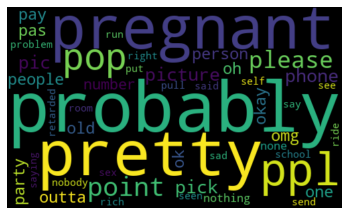

In [256]:
words_probs = ' '.join([w for w in words_list])

wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(words_probs)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()